all required installation

In [8]:
!pip3 install -U scikit-learn
!pip3 install -U opencv-python
!pip3 install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


all required import 

In [9]:
import os

from google.colab import drive

import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, concatenate, Input
from keras import backend as K
from keras import applications
from keras import optimizers
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import tensorflow as tf


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Mounting the drive and moving to the correct directory

In [10]:
drive.mount('/content/drive')
os.chdir('/content/drive/Shareddrives/16/16')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the final model

In [11]:
model_dir = "./"
nameModel = "final_model"

M = load_model(model_dir + nameModel)

A cell to define a function useful to test the model

In [12]:
def finalPreProcessing(array):
    img = Image.fromarray(array,"RGB")
    shapemax=max(img.height,img.width)
    shapemin=min(img.height,img.width)
    if (shapemax-shapemin)%2==0:
        diff1=int((shapemax-shapemin)/2)
        diff2=diff1
    else:
        diff1=int((shapemax-shapemin)/2)
        diff2 = diff1+1
    if img.mode != 'RGB':
        img=img.convert('RGB')
    if shapemax==img.height:
        img1Van=np.pad(img, ((0, 0), (diff1, diff2), (0,0)), mode = 'reflect')
    else:         
        img1Van=np.pad(img, ((diff1, diff2), (0, 0), (0,0)), mode = 'reflect')
    img1Van = cv2.resize(img1Van,(512,512))
    return img1Van

def one_hot(a, n):
  e = np.eye(n) # Identity matrix n x n
  result=e[a.astype(np.uint8)] 
  result1 = tf.convert_to_tensor(result)
  return result1

def predict(X):
    myNumpy = X.numpy()
    myList = np.array([])
    for i in range((myNumpy.shape)[0]):
        array = myNumpy[i]
        newArray = finalPreProcessing(array)
        """plt.imshow(newImg)
        plt.show()"""
        finput = newArray.astype(np.float32)
        sample = np.expand_dims(finput, axis=0)
        prediction = M.predict(sample)
        myList = np.append(myList,[np.argmax(prediction)])
    
    return one_hot(myList, 3)

Found 674 images belonging to 3 classes.


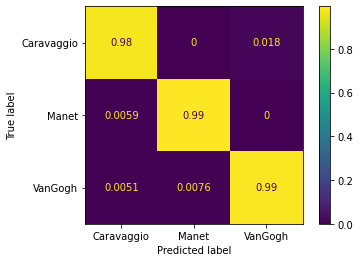

In [ ]:
#utilizzato per stampare la matrix sicuro corretta
nb_val_samples = !find ./UltimateDataSet2.0/validation -name "*jpg" -o -name "*png" | wc -l

validation_datagen = ImageDataGenerator()
val_data_dir = "./UltimateDataSet2.0/validation/"


batch_size = 8
img_width, img_height = 512, 512  # resize dimensions of our images

validation_generator = validation_datagen.flow_from_directory(
    
    val_data_dir,
    target_size=(img_width, img_height),  # resize the image in order to match the network input size
    batch_size=batch_size,
    shuffle = 'False',
    class_mode='categorical', # set to 'categorical' for multi-class problems
    ) 



input, y_true_bin = validation_generator.next()

y_pred_bin = M.predict(input, batch_size)

for i in range((validation_generator.samples // batch_size)):
  input, tmp = validation_generator.next()
  y_true_bin=np.concatenate((y_true_bin,tmp),axis=0)
  y_pred_bin = np.concatenate((y_pred_bin, M.predict(input, batch_size+1)), axis=0)

y_true = np.argmax(y_true_bin, axis=1)
y_pred = np.argmax(y_pred_bin, axis=1)

target_names = ['Caravaggio', 'Manet', 'VanGogh']
cm = confusion_matrix(y_true, y_pred, normalize ='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()

Found 674 images belonging to 3 classes.
<class 'tensorflow.python.framework.ops.EagerTensor'>


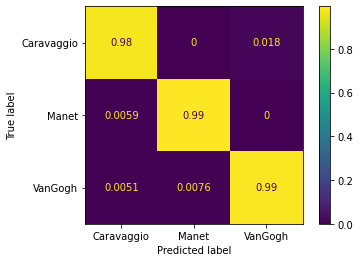

In [ ]:
#utilizzato per stampare la matrix generata dalla funzione di predict
nb_val_samples = !find ./UltimateDataSet2.0/validation -name "*jpg" -o -name "*png" | wc -l

validation_datagen = ImageDataGenerator()
val_data_dir = "./UltimateDataSet2.0/validation/"


batch_size = 8
img_width, img_height = 512, 512  # resize dimensions of our images

validation_generator = validation_datagen.flow_from_directory(
    
    val_data_dir,
    target_size=(img_width, img_height),  # resize the image in order to match the network input size
    batch_size=batch_size,
    shuffle = 'False',
    class_mode='categorical', # set to 'categorical' for multi-class problems
    ) 


input, y_true_bin = validation_generator.next()
test = (input).astype(np.uint8)
test1 = tf.convert_to_tensor(test)
print(type(test1))
y_ret = np.argmax(predict(test1), axis=1)

for i in range((validation_generator.samples // batch_size)):
  input, tmp = validation_generator.next()
  test = (input).astype(np.uint8)
  y_true_bin=np.concatenate((y_true_bin,tmp),axis=0)
  y_ret = np.append(y_ret,[np.argmax(predict(tf.convert_to_tensor(test)), axis=1)])

y_true = np.argmax(y_true_bin, axis=1)

target_names = ['Caravaggio', 'Manet', 'VanGogh']
cm = confusion_matrix(y_true, y_ret, normalize ='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()